In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras.layers import (Dense, Flatten, Reshape, Convolution2D, MaxPooling2D, InputLayer,
                                        ## data augmentation:
                                        Rescaling, Dropout,RandomRotation, RandomFlip) 

from keras.datasets import fashion_mnist

import keras

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [13]:
def get_preprocessing(shape: tuple) -> keras.Sequential:
    preprocessor = keras.Sequential([
        Reshape(shape),
        Rescaling(1./255),

        # RandomFlip(),
        RandomRotation(.10),
    ])

    return preprocessor

def get_model(n_class: int, activation: str = 'relu') -> keras.Sequential:

    preprocessor = get_preprocessing((28, 28, 1))

    model = tf.keras.Sequential([
        ### integrer le modele "get_preprocessing" dans le modele pricipale
        InputLayer((28,28)),
        preprocessor,

        Convolution2D(filters=32, kernel_size=3, activation=activation),
        MaxPooling2D(2),

        Convolution2D(filters=64, kernel_size=3, activation=activation),
        MaxPooling2D(2),

        Flatten(),
        
        Dropout(.3), ## 30% des poids entre les deux couches sont mis à 0 (durant l'entrainement)

        Dense(units=128, activation=activation),
        
        Dropout(.3), ## 30% des poids entre les deux couches sont mis à 0 (durant l'entrainement)
        
        Dense(units=128, activation=activation),
        
        
        Dense(units=n_class, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model


def plot_lc(history: dict, metrics: list = ['loss', 'accuracy']) -> None:
    plt.figure(figsize=(20, 8))
    for i, metric in enumerate(metrics):
        plt.subplot(1, 2, i+1)
        plt.title(f'Learning curve for {metric}\n')
        plt.plot(history[metric], label='train')
        plt.plot(history[f'val_{metric}'], label='val')
        plt.xlabel('epochs')
        plt.ylabel(metric)
        plt.legend()
        if metric == 'accuracy':
            plt.ylim(0,1.1)
    plt.show()




def plot_cm_display(y_true: np.array, y_pred: np.array) -> None:
    cm = confusion_matrix(y_true, y_pred)
    
    #plt.figure(figsize=(20, 8))
    #plt.title('Confusion Matrix\n')
    CM = ConfusionMatrixDisplay(cm)
    CM.plot()
    #sns.heatmap(cm, cmap='vlag', annot=True, fmt='d', cbar=False)
    #plt.xlabel('y_pred')
    #plt.ylabel('y_true')
    plt.show()

In [14]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


print(X_train.shape)
print(y_train.shape)


(60000, 28, 28)
(60000,)


In [15]:
cnn = get_model(10)
cnn.fit(X_train, y_train, validation_split=.2, epochs=7, batch_size=1024)

Epoch 1/7
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 185ms/step - accuracy: 0.5058 - loss: 1.3288 - val_accuracy: 0.7252 - val_loss: 0.7246
Epoch 2/7
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 180ms/step - accuracy: 0.7107 - loss: 0.7720 - val_accuracy: 0.7613 - val_loss: 0.6216
Epoch 3/7
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 188ms/step - accuracy: 0.7436 - loss: 0.6788 - val_accuracy: 0.7782 - val_loss: 0.5774
Epoch 4/7
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 185ms/step - accuracy: 0.7645 - loss: 0.6297 - val_accuracy: 0.7969 - val_loss: 0.5413
Epoch 5/7
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 188ms/step - accuracy: 0.7785 - loss: 0.5926 - val_accuracy: 0.8068 - val_loss: 0.5249
Epoch 6/7
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 197ms/step - accuracy: 0.7890 - loss: 0.5702 - val_accuracy: 0.8126 - val_loss: 0.4965
Epoch 7/7
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 191ms/step - accuracy: 0.7978 - loss: 0.5419 - val_accuracy: 0.8230 - val_loss: 0.4774


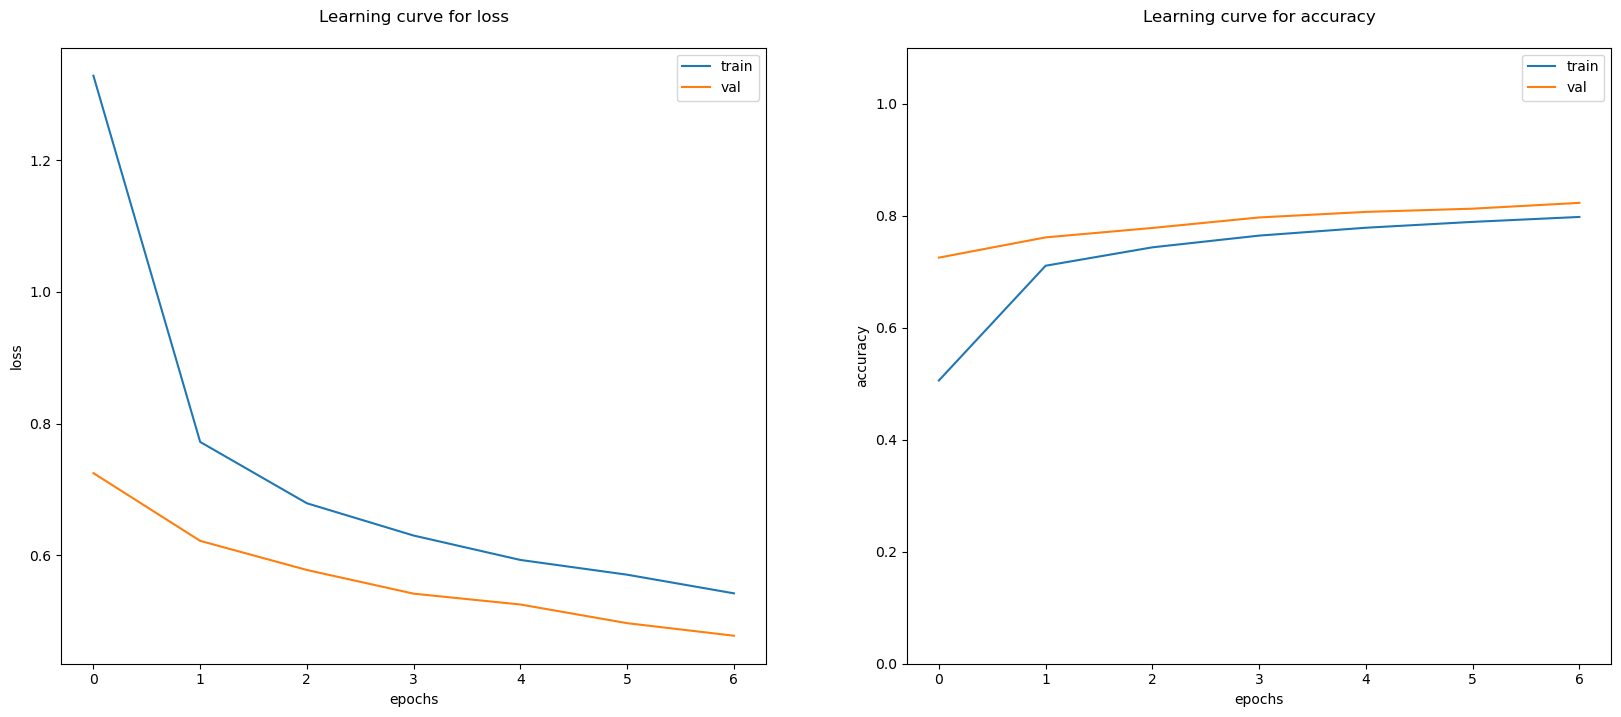

In [16]:
plot_lc(cnn.history.history)

In [17]:
y_pred = np.argmax(cnn.predict(X_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


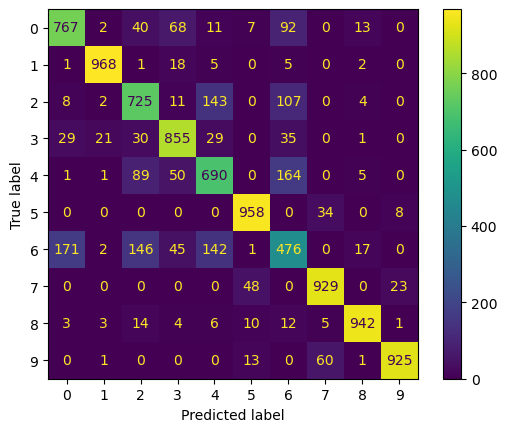

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      1000
           1       0.97      0.97      0.97      1000
           2       0.69      0.72      0.71      1000
           3       0.81      0.85      0.83      1000
           4       0.67      0.69      0.68      1000
           5       0.92      0.96      0.94      1000
           6       0.53      0.48      0.50      1000
           7       0.90      0.93      0.92      1000
           8       0.96      0.94      0.95      1000
           9       0.97      0.93      0.95      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



In [18]:
plot_cm_display(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Visualiser random transformation

<br>

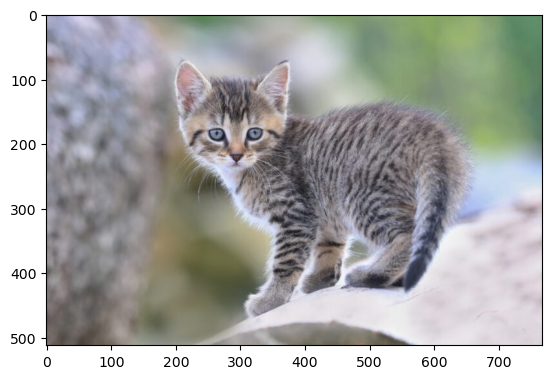

In [8]:
chat = plt.imread('chaton.jpg')
plt.imshow(chat)
plt.show()

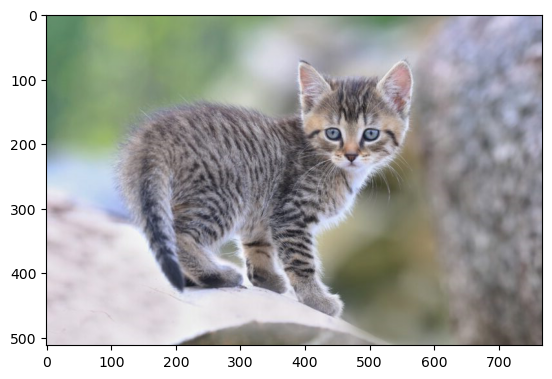

In [9]:
plt.imshow(tf.image.random_flip_left_right(chat))

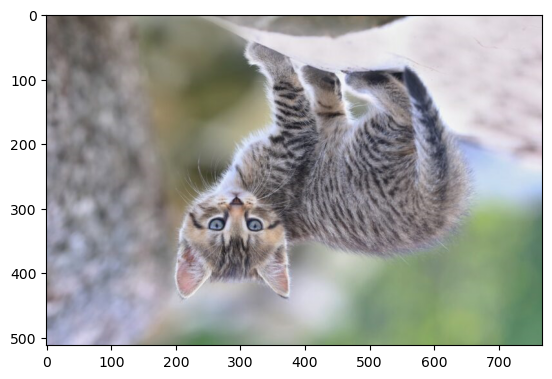

In [10]:
plt.imshow(tf.image.random_flip_up_down(chat))

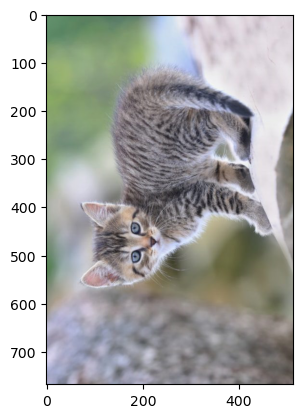

In [11]:
plt.imshow(tf.image.rot90(chat))